# Evolution of $n_{sig}$ and $n_{bkg}$ according to the cut on the BDT

Works with `fit/COMMON/BDT_bkg_high_B0M/fit_all_data_V8_2_fits_BDTs_recomputed_sWeights.ipyng`
- BDT: `gradient_bkgHighB0M`
    * Background data: `common` data at high `B0_M`
- Data: `common_Dst_constr_BDT{cut_BDT}`

## Import

In [2]:
import numpy as np
import json

from bd2dst3pi.locations import loc

import sys
sys.path.append(loc.SCRIPTS)
from plot.line import plot_x_list_ys
from load_save_data import retrieve_params
from uncertainties import ufloat, unumpy, umath

Welcome to JupyROOT 6.22/02


## Tool functions

In [3]:
def get_index_max(L):
    idx = 0
    candidate_max = L[0]
    for i in range(1, len(L)):
        if candidate_max < L[i]:
            candidate_max = L[i]
            idx = i
    return idx

def efficiency(N):
    return np.array(N/N[0])

## Load data

we define the the usual average $\sigma = f\times \sigma_L + (1-f) \sigma_R$ of the full `common` signal shape.
`n_B` or $B$ is computed with the integral over $\mu\pm3\sigma$ under the signal peak.

In [4]:
name_data = "common_Dst_constr"
name_BDT = 'gradient_bkgHighB0M'

In [11]:
def round_int(n):
    if n%1==0:
        return int(n)
    else:
        return n

l_BDT = []
l_BDT_ref = []
starting_value = -10
end_value      =  1.75
step           = 0.5
sub_step        = 0.25

value = starting_value
while value <= end_value:
    eff_step = sub_step if value >= -6 else step
    if value==0:
        value = 0
    l_BDT.append(round_int(value))    
    value = np.round(value + eff_step, 3)


In [12]:
l_BDT

[-10,
 -9.5,
 -9,
 -8.5,
 -8,
 -7.5,
 -7,
 -6.5,
 -6,
 -5.75,
 -5.5,
 -5.25,
 -5,
 -4.75,
 -4.5,
 -4.25,
 -4,
 -3.75,
 -3.5,
 -3.25,
 -3,
 -2.75,
 -2.5,
 -2.25,
 -2,
 -1.75,
 -1.5,
 -1.25,
 -1,
 -0.75,
 -0.5,
 -0.25,
 0,
 0.25,
 0.5,
 0.75,
 1,
 1.25,
 1.5,
 1.75]

In [13]:
lS = [] # Signal B0 -> Ds 3pi
lB_combi = [] # combinatorial background, computed with sigma as the 'usual' mean of sigmaL and sigmaR

for i, BDT in enumerate(l_BDT):
    
    params = retrieve_params(name_data+f'_BDT{BDT}', name_folder=name_data)

    lB_combi.append(ufloat(params['n_B'], params['n_B_err'])) # combinatorial   
    lS.append(ufloat(params[f'n_sig|BDT{BDT}'],params[f'n_sig|BDT{BDT}_err']))


lS = np.array(lS)
lB_combi = np.array(lB_combi)

ltot = lS + lB_combi
squareRootltot = unumpy.sqrt(ltot)

## Define FoM

- Signal purity: $\frac{S}{S+B}$
- Signal significance: $\frac{S}{\sqrt{S+B}}$
- Figure of merit: $\frac{S}{S+B}\frac{S}{\sqrt{S+B}}$

In [14]:
signal_purity = lS/ltot
signal_significance = lS/squareRootltot
FoM = signal_purity*signal_significance

## Plots with $\sigma_2$

### S, B

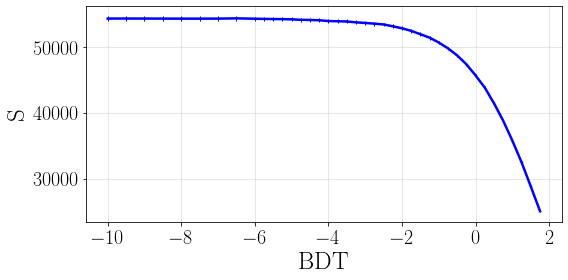

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr/BDT_vs_S


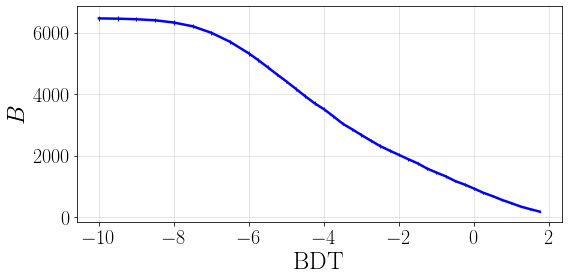

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr/BDT_vs_B


(<Figure size 576x288 with 1 Axes>, <AxesSubplot:xlabel='BDT', ylabel='$B$'>)

In [15]:
plot_x_list_ys(l_BDT, lS, 'BDT', 
               ['S'], surnames_y=['S'],
               name_folder=name_data)

plot_x_list_ys(l_BDT, lB_combi, 'BDT', 
               ['$B$'],
               name_folder=name_data)

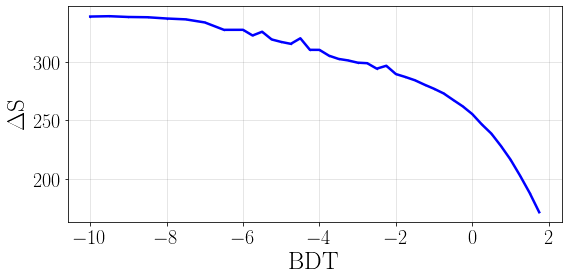

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr/BDT_vs_S_err


(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='$\\Delta $S'>)

In [16]:
plot_x_list_ys(l_BDT, unumpy.std_devs(lS), 'BDT', 
               ['S_err'], surnames_y=['$\Delta $S'],
               name_folder=name_data)

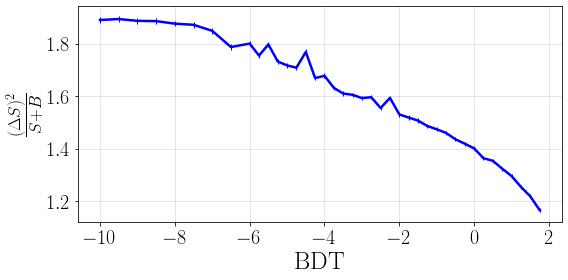

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr/BDT_vs_S_err2_d_S+B


(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='$\\frac{(\\Delta S)^2}{S+B}$'>)

In [17]:
plot_x_list_ys(l_BDT, np.square(unumpy.std_devs(lS))/ltot, 'BDT', 
               ['S_err2_d_S+B'], surnames_y=['$\\frac{(\\Delta S)^2}{S+B}$'],
               name_folder=name_data)

### FoM

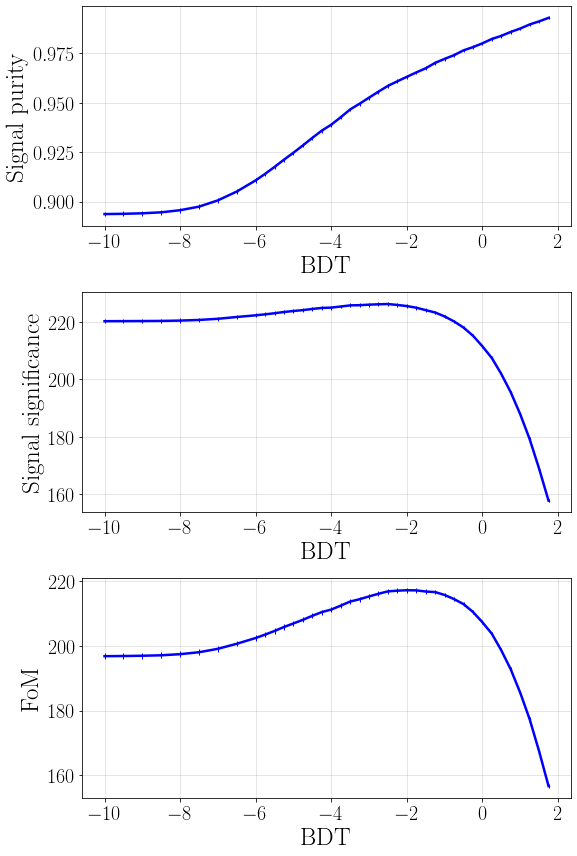

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr/[['\\frac{S}{S+B}'],_['\\frac{S}{\\sqrt{S+B}}'],_['\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}']]_vs_Signal_purity_Signal_significance_FoM


(<Figure size 576x864 with 3 Axes>,
 array([<AxesSubplot:xlabel='BDT', ylabel='Signal purity'>,
        <AxesSubplot:xlabel='BDT', ylabel='Signal significance'>,
        <AxesSubplot:xlabel='BDT', ylabel='FoM'>], dtype=object))

In [18]:
plot_x_list_ys(l_BDT, [[signal_purity],[signal_significance],[FoM]], 'BDT', 
               [['Signal purity'],['Signal significance'],['FoM']],
               [['$\\frac{S}{S+B}$'],['$\\frac{S}{\\sqrt{S+B}}$'],['$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$']], 
               name_folder=name_data)

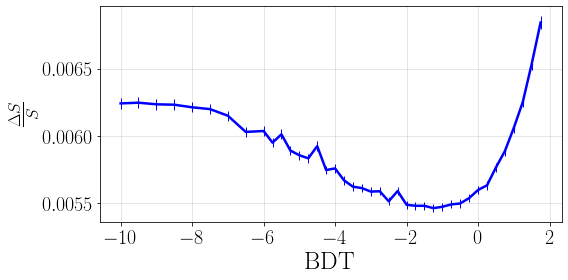

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr/BDT_vs_S_err_d_S


0.005460554979189145+/-2.9817660680747357e-05

In [19]:
plot_x_list_ys(l_BDT, unumpy.std_devs(lS)/lS, 'BDT', 
               ['S_err_d_S'], surnames_y=['$\\frac{\\Delta S}{S}$'],
               name_folder=name_data)
min(unumpy.std_devs(lS)/lS)

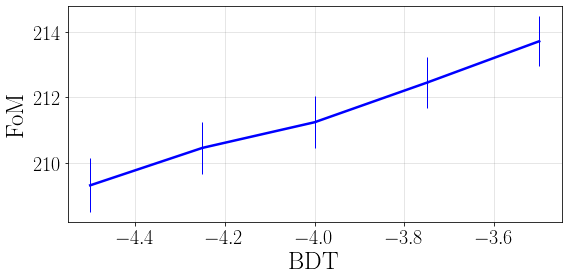

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr/\frac{S}{S+B}\frac{S}{\sqrt{S+B}}_vs_FoM


(<Figure size 576x288 with 1 Axes>, <AxesSubplot:xlabel='BDT', ylabel='FoM'>)

In [20]:
start = 14
stop = 19
plot_x_list_ys(l_BDT[start:stop], FoM[start:stop], 'BDT', 
               'FoM',
               '$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$', 
               name_folder=name_data)

### ROC curve

In [21]:
S_efficiency = efficiency(lS)
B_efficiency = efficiency(lB_combi)

In [22]:
l_BDT_label = []
for BDT in l_BDT:
    value = BDT if int(BDT)==BDT and BDT > -7 else None
    l_BDT_label.append(value)

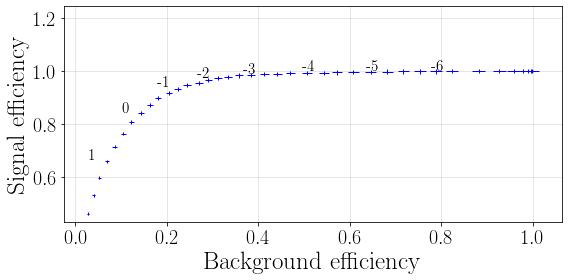

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/gradient_bkgHighB0M/Background_efficiency_vs_Signal_efficiency


(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:xlabel='Background efficiency', ylabel='Signal efficiency'>)

In [23]:
plot_x_list_ys(B_efficiency, S_efficiency, 'Background efficiency', 
               'Signal efficiency',
               name_folder=name_BDT, linestyle='', annotations=l_BDT_label, factor_ymax=1.2)

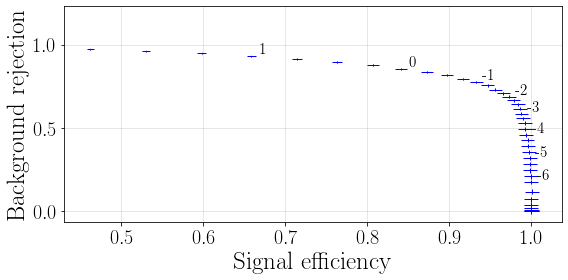

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/gradient_bkgHighB0M/Signal__efficiency_vs_Background_rejection


In [24]:
fig, ax = plot_x_list_ys(S_efficiency, 1 - B_efficiency, 'Signal  efficiency', 
               'Background rejection',
               name_folder=name_BDT, linestyle='', annotations=l_BDT_label, factor_ymax=1.2, 
                fontsize_annot=15., #log_scale='y', 
               space_x=12, space_y=6
              )

## Optimal cut

In [25]:
import json
from bd2dst3pi.locations import loc

In [26]:
BDT=-0.225
#name_data_BDT = "common_cutDeltaM_V8_rFixed"
name_data_BDT = "common_cutDeltaM_V8_rFixed_MC_cor"
name_data = 'all_common_cutDeltaM_V8_fixedTails'

with open(f'{loc.JSON}/{name_data_BDT}_BDT{BDT}_params.json', 'r') as f:
    params_opt = json.load(f)

with open(f'{loc.JSON}/{name_data}_params.json', 'r') as f:
    params = json.load(f)       

FileNotFoundError: [Errno 2] No such file or directory: '/afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_V8_rFixed_MC_cor_BDT-0.225_params.json'

In [37]:
DeltaSoverS_opt = params_opt[f"n_sig|BDT{BDT}_err"]/params_opt[f"n_sig|BDT{BDT}"]
DeltaSoverS = params[f"n_sig_err"]/params[f"n_sig"]

In [38]:
print("optimal: ", DeltaSoverS_opt)
print("No cuts: ", DeltaSoverS)

optimal:  0.0067271744893037935
No cuts:  0.007489910880635727
